In [ ]:
import gspread
import pandas as pd
from datetime import datetime, timedelta
import calendar
import matplotlib.pyplot as plt
from oauth2client.service_account import ServiceAccountCredentials
import smtplib
from email.message import EmailMessage
from dotenv import load_dotenv
import os
import mimetypes
from pathlib import Path
import json

load_dotenv()
email_username = os.getenv('EMAIL_USERNAME')
email_password = os.getenv('EMAIL_PASSWORD')

# Set up credentials
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
# creds = ServiceAccountCredentials.from_json_keyfile_name(os.getenv('TRY'), scope)
json_keyfile_dict = json.loads(os.getenv('JSON_KEYFILE_DICT'))
creds = ServiceAccountCredentials.from_json_keyfile_dict(json_keyfile_dict, scope)
client = gspread.authorize(creds)


# Open Spreadsheet based on sheet key
spreadsheet_key = os.getenv('SPREADSHEET_KEY')
spreadsheet = client.open_by_key(spreadsheet_key)


# Open specific Sheet based on title
sheet_title = 'Expenses'  
sheet = spreadsheet.worksheet(sheet_title)

# Extract all of the data
data = sheet.get_all_records()

# Convert from JSON to pandas Data Frame
data = pd.DataFrame(data)


In [ ]:
# 

data[data['Expense Type'] == "Gas"]



In [12]:
# COMECO (Importar os dados)

########################################
#         Data Import from Sheets      #
########################################
import gspread
import pandas as pd
from datetime import datetime, timedelta
import calendar
import matplotlib.pyplot as plt
from oauth2client.service_account import ServiceAccountCredentials
import smtplib
from email.message import EmailMessage
from dotenv import load_dotenv
import os
import mimetypes
from pathlib import Path
import json

load_dotenv()
email_username = os.getenv('EMAIL_USERNAME')
email_password = os.getenv('EMAIL_PASSWORD')

# Set up credentials
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
# creds = ServiceAccountCredentials.from_json_keyfile_name(os.getenv('TRY'), scope)
json_keyfile_dict = json.loads(os.getenv('JSON_KEYFILE_DICT'))
creds = ServiceAccountCredentials.from_json_keyfile_dict(json_keyfile_dict, scope)
client = gspread.authorize(creds)


# Open Spreadsheet based on sheet key
spreadsheet_key = os.getenv('SPREADSHEET_KEY')
spreadsheet = client.open_by_key(spreadsheet_key)


# Open specific Sheet based on title
sheet_title = 'Expenses'  
sheet = spreadsheet.worksheet(sheet_title)

# Extract all of the data
data = sheet.get_all_records()

# Convert from JSON to pandas Data Frame
data = pd.DataFrame(data)

all_gas = data[data['Expense Type'].isin(['Gas'])]
all_gas['Timestamp'] = pd.to_datetime(all_gas['Timestamp'])


#SILVER1
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

expenses_data = expenses_data[expenses_data['Timestamp'].dt.to_period('M') != '2023-02']


# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Gas'])]

# Current date
current_date = datetime.now()

this_month = current_date.strftime("%B")

this_year = current_date.strftime("%Y")


if current_date.weekday() >= 4:  # Friday = 4, Saturday = 5, Sunday = 6
    week_start = (current_date - timedelta(days=current_date.weekday() - 4)).replace(hour=0, minute=0, second=0)
else:
    week_start = (current_date - timedelta(days=current_date.weekday() + 3)).replace(hour=0, minute=0, second=0)

week_end = (week_start + timedelta(days=6)).replace(hour=23, minute=59, second=59)

# Filter data for the current week
current_week_data = filtered_data[(filtered_data['Timestamp'] >= week_start) & (filtered_data['Timestamp'] <= week_end)]

# Sum of expenses for the current week
current_week_expenses1 = current_week_data['Expense Amount'].sum()

# Calculate weekly average expenses on food
weekly_average_expenses1 = filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().mean()

# Days until the end of this week
days_until_end_of_week = (week_end - current_date).days

# Outputting the report
week_start_str = week_start.strftime('%Y-%m-%d')
week_end_str = week_end.strftime('%Y-%m-%d')


# Resampling data to a weekly basis and summing expenses by type
weekly_resampled_data = filtered_data.groupby([pd.Grouper(key='Timestamp', freq='W-Thu')]).sum().reset_index()

# Pivot the data to have expense types as columns for plotting
pivot_data = weekly_resampled_data.pivot_table(values='Expense Amount', index='Timestamp', aggfunc='sum')

average_spending = pivot_data.mean().sum()

C:\Users\lohan\AppData\Local\Temp\ipykernel_13244\1571344596.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_gas['Timestamp'] = pd.to_datetime(all_gas['Timestamp'])


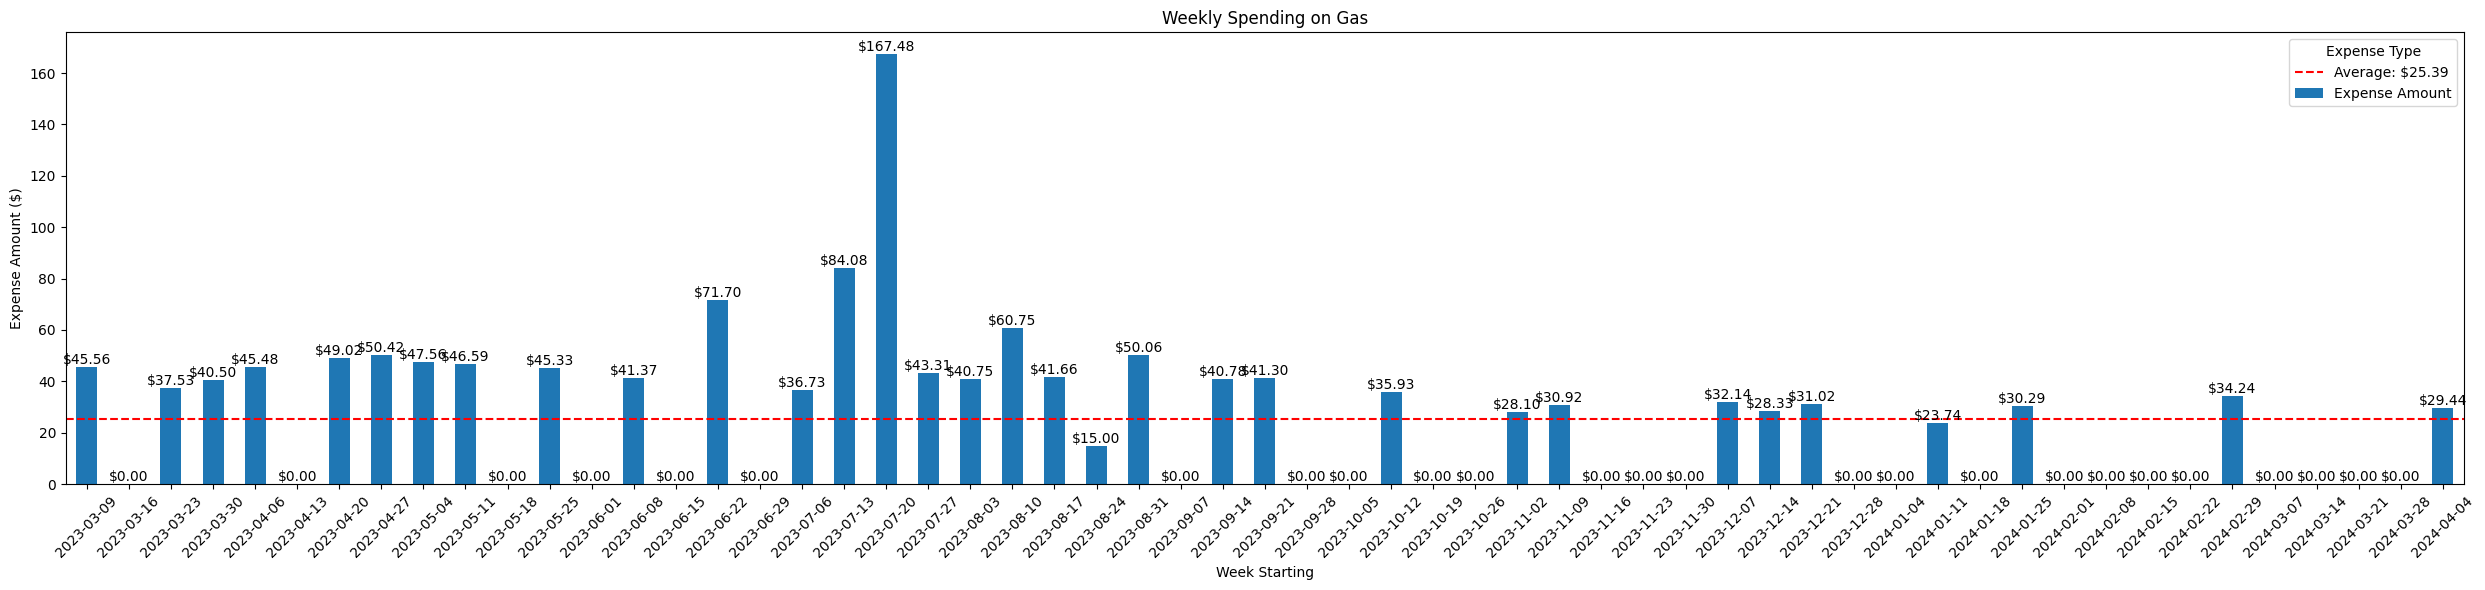

In [14]:
# Plotting the weekly spending with different colors for each expense type, stacked
plt.figure(figsize=(25, 6))
ax = pivot_data.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Weekly Spending on Gas')
plt.xlabel('Week Starting')
plt.ylabel('Expense Amount ($)')

# Formatting the x-axis to show the start of each week
x_labels = [item.strftime('%Y-%m-%d') for item in pivot_data.index]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)


# Annotating values on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='$%.2f')

plt.axhline(y=average_spending, color='r', linestyle='--', label=f'Average: ${average_spending:.2f}')


plt.legend(title='Expense Type')
plt.tight_layout()
plt.show()

In [11]:
filtered_data

,Timestamp,Expense Amount,Expense Type,Comment,Outlier
0,2024-01-07 16:41:09,23.74,Gas,,
19,2024-01-25 17:30:17,30.29,Gas,,
61,2024-02-23 18:09:04,34.24,Gas,,
114,2024-04-04 10:56:45,29.44,Gas,,
170,2023-03-03 00:00:00,45.56,Gas,,
181,2023-03-17 00:00:00,37.53,Gas,,
190,2023-03-24 00:00:00,40.50,Gas,,
196,2023-03-31 00:00:00,45.48,Gas,,
204,2023-04-14 00:00:00,49.02,Gas,,
210,2023-04-21 00:00:00,50.42,Gas,,
